### Fill out:
Name & Surname: Jared Roff

Student ID: 34987444

## W7&W8 post studio exercises (multivariate linear regression, regularisation)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to add comments in markdown cell after each exercise. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

We will use diabetes data. Download this data from [the Gitlab site](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/tree/main/Machine-Learning/Supervised-Methods/Regression/Diabetes_Data.csv) into the same directory as the notebook on your computer. 

Run the following code from the pre-studio notebook.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split # for splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression # models we are going to use
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # for comparing the predicted and test values
import seaborn as sns

In [3]:
df = pd.read_csv('Diabetes_Data.csv', usecols = range(0,11)) # read the Diabetes dataset in to a pandas dataframe
corrs = df.corr() # calculate the correlation table

X = df.drop(['Y'],axis=1)  # Create a Dataframe without the target variable Y.
Y = df['Y']                # Extract a Series of the target Y values.

corrs

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [4]:
# The below code is identical to our first attempt, the only change is
# substituting nX for X in train_test_split, to use our normalised data.
nX =(X-X.mean())/X.std() # create nX, a normalised version of X

# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y, test_size=0.2,
    random_state=np.random.RandomState(31287)  # Keeps the 'random' split consistent.
) 

# Construct and fit the model
linear = LinearRegression()  # Instantatiate the linear regression model
linear.fit(X_train,Y_train);  # Fit the model parameters to the training data.

In [61]:
from sklearn.model_selection import cross_validate, RepeatedKFold # import sklearn methods

# cross_validate takes the particular model, in this case linear regression which we instantatiated earlier,
# and undertakes a number of runs according the method specified by cv=
# RepeatedKFold splits the data into n sections and repeat the regression modelling 5 times, giving 25 runs
# return_estimator=True returns the fitting data for each run
scores = cross_validate(
    linear, nX, Y,
    cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=np.random.RandomState(2351786)),
    return_estimator=True,
)
# take the results for each simulation (estimator), extract the coefficients for each run 
# and add them to a dataframe with columns being the feature names
coefs = pd.DataFrame([est.coef_ for est in scores['estimator']],columns=nX.columns)

### Exercise 1 (correlation coefs vs linear regression coefs)

Compare the (mean of) model coefficients computed in the linear regression with the correlation scores found in the initial data analysis in pre-studio notebook. Choose any plot or table which you think is suitable for this comparison. Comment on whether the model fitting results are consistent with the correlation scores.

In [62]:
# Hint 1: Table of correlation coefficients and dataframe with reg. coefs from cross validation are given above.
# Hint 2: Create a dataframe which has the correlations with Y as a column, and then the 
# mean of coefficients computed from the cross_validate method for the other column.
# You will need to scale the coefficients in order to compare this with the correlations (divide by 30, for example). 
# Hint 3: A bar plot seems like a good idea!

# Calculate correlation coefficients between each feature in nX and target variable 
Y_corr = nX.corrwith(Y)

mean_coefs = coefs.mean()  # Mean across folds for each feature

# Step 3: Scale the coefficients
scaled_mean_coefs = mean_coefs / 30

scaled_mean_coefs

AGE   -0.016647
SEX   -0.381032
BMI    0.825230
BP     0.515320
S1    -1.234392
S2     0.740748
S3     0.148015
S4     0.276706
S5     1.183557
S6     0.108020
dtype: float64

In [67]:
comparison_df = pd.DataFrame({
    'Correlation with Y': Y_corr,
    'Mean of Coefficients (Scaled)': scaled_mean_coefs
})

comparison_df

,Correlation with Y,Mean of Coefficients (Scaled)
AGE,0.187889,-0.016647
SEX,0.043062,-0.381032
BMI,0.586450,0.825230
BP,0.441482,0.515320
S1,0.212022,-1.234392
S2,0.174054,0.740748
S3,-0.394789,0.148015
S4,0.430453,0.276706
S5,0.565883,1.183557
S6,0.382483,0.108020


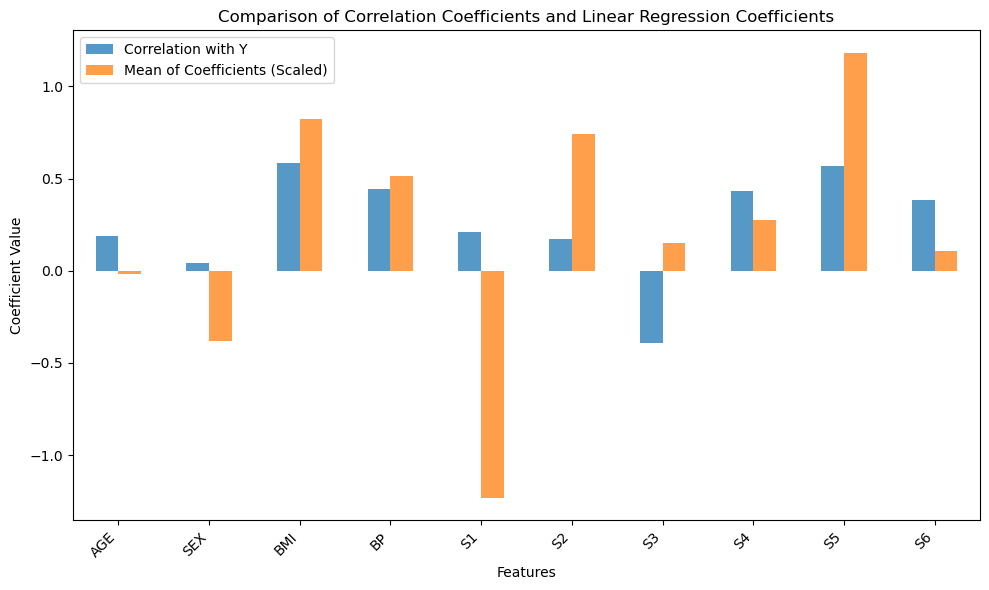

In [68]:
comparison_df.plot(kind='bar', figsize=(10, 6), alpha=0.75)
plt.title('Comparison of Correlation Coefficients and Linear Regression Coefficients')
plt.ylabel('Coefficient Value')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Exercise 2 (coeeficient variability in a simpler model)

Try fitting a linear regression model to a subset of the features. To do this, select 3-4 columns from the normalised dataframe `nX` to use when constructing the train-test split, then fit the model parameters to this new training data as before. Describe how you selected your subset of features. Did the model coefficients for your chosen features turn out to be similar or different to those in the full model given in pre-studio notebook? (Comment on change in variability of the coefficients. If there is a difference, explain why.)

In [39]:
#Settings: 80-20 split, random state 31287.

#Aim is to show variability of corresponding coefficients 
#(train-test-split + cross validation + appropriate plot + compare to pre-studio)

# No regularisation yet.

# Taking subset 
nX_subset = nX.iloc[:,[0,1,2,3]]

nX_subset

,AGE,SEX,BMI,BP
0,0.799594,1.064282,1.295620,0.459320
1,-0.039522,-0.937474,-1.080955,-0.552878
2,1.791277,1.064282,0.933475,-0.119079
3,-1.870322,-0.937474,-0.243495,-0.769778
4,0.113044,-0.937474,-0.764079,0.459320
...,...,...,...,...
437,0.875877,1.064282,0.412892,1.254619
438,-0.115806,1.064282,-0.334032,-1.420477
439,0.875877,1.064282,-0.334032,0.363161
440,-0.954922,-0.937474,0.820305,0.025521


In [13]:
# Split into a training set with 80% of the data, and a testing set as the remainder.
X_train, X_test, Y_train, Y_test = train_test_split(
    nX_subset, Y, test_size=0.2,
    random_state=np.random.RandomState(31287)  # Keeps the 'random' split consistent.
) 

# Construct and fit the model
linear = LinearRegression()  # Instantatiate the linear regression model
linear.fit(X_train,Y_train)  # Fit the model parameters to the training data.

# Evaluate model performance.
training_predictions = linear.predict(X_train)  # Get model predictions for both.
testing_predictions = linear.predict(X_test)    # training and testing data.

# Create a table of the various scores.
pd.DataFrame({
    "R^2": {
        "train": r2_score(Y_train, training_predictions),
        "test": r2_score(Y_test, testing_predictions)
    },
    "RMSE": {
        "train": mean_squared_error(Y_train, training_predictions, squared=False),
        "test": mean_squared_error(Y_test, testing_predictions, squared=False),
    },
    "MAE": {
        "train": mean_absolute_error(Y_train, training_predictions),
        "test": mean_absolute_error(Y_test, testing_predictions),
    },
})

,R^2,RMSE,MAE
train,0.390231,59.697253,48.920548
test,0.420606,59.558183,49.777126


In [15]:
feature_names = nX_subset.columns.tolist() # write the column names to a list

# create a Series for which the rows are the feature names and the data is the regression coefficient values
coefficients = pd.Series(data=linear.coef_.transpose(), index=feature_names)
coefficients

AGE     0.326170
SEX    -4.952704
BMI    37.793391
BP     18.836843
dtype: float64

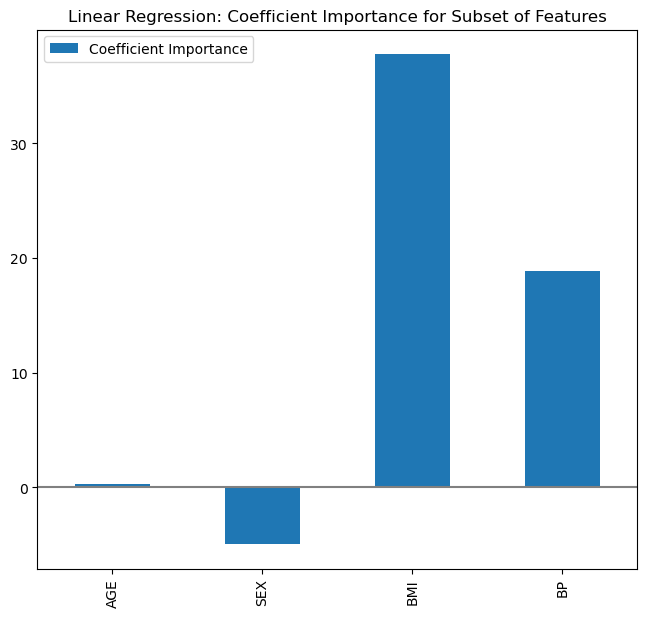

In [43]:
coefs = pd.DataFrame(
    linear.coef_,
    columns=['Coefficient Importance'],
    index=nX_subset.columns  # Use the feature names as the index
)

# Step 5: Plot the coefficient importance
coefs.plot(kind='bar', figsize=(10, 7))
plt.title('Linear Regression: Coefficient Importance for Subset of Features')
plt.axhline(y=0, color='.5')
plt.subplots_adjust(left=.3)
plt.show()

In [18]:
# The model coefficients are different from the pre-studio notebook. The change in variability is due to each of the variables having a lower standard deviation. 

***
In W8 pre-studio notebook we found the optimal tuning parameters ($\alpha$) for both Ridge and Lasso regularisation via numerical experimentation. In practice however, the process of tuning and fitting a linear regression with Ridge or Lasso regularisation is automated through the functions `RidgeCV` and `LassoCV` respectively. When we call the .fit method for `RidgeCV`, cross-valiadation is implemented by performing Ridge linear regression over a variety of tuning parameters in order to determine the optimal tuning parameter $\alpha$. Once the optimal tuning parameter is found, the model can then be fit. In fact, we can extract the optimal tuning parameter $\alpha$ by calling .alpha_. A similar process is utilised for `LassoCV`.

N.B. Both Ridge and Lasso regularisation require the feature set to be normalised. 

### Exercise 3 (RidgeCV)

Here you will use `RidgeCV` from scikit-learn to perform Ridge linear regression and cross validation all in one go. Your tasks are the following:

1. Instantiate the RidgeCV model by calling RidgeCV (done for you).
2. Fit the model to the training data.
3. Determine the training and testing R2 scores.
4. Call .alpha_ in order to determine the optimal tuning parameter alpha.

The syntax here is essentially the same as any other machine learning algorithm from scikit-learn. If you have any issues, you can consult the scikit-learn guide on `RidgeCV`.

Do you get the same optimal tuning parameter alpha as obtained in this notebook? Any idea why that is or isn't the case?

In [24]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge 

# create an array of 21 alpha values logarithmically distributed between 10**(-2) and 10**2
alfas = np.logspace(-2, 2, num=21) 

X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y,
    test_size=0.2,
    random_state=1235
) 

ridgecv = RidgeCV(alfas, store_cv_values=True)

# Now you will need to fit the model on the train data using the instantiated model ridgecv, determine the training
# and testing R^2 scores, then call .alpha_ to find the optimal tuning parameter.

In [30]:
# create an array of 21 alpha values logarithmically distributed between 10**(-2) and 10**2
alfas = np.logspace(-2, 2, num=21) 

# Instantiate the RidgeCV model with the alpha values
ridgecv = RidgeCV(alphas=alfas, store_cv_values=True)

# Fit the model on the training data
ridgecv.fit(X_train, Y_train)

# Determine the R² scores for training and testing sets
train_r2 = ridgecv.score(X_train, Y_train)
test_r2 = ridgecv.score(X_test, Y_test)

# Get the optimal tuning parameter (alpha)
optimal_alpha = ridgecv.alpha_

# Print results
print(f"Optimal alpha: {optimal_alpha:.3f}")
print(f"Training score with optimal alpha is: {train_r2:.3f}")
print(f"Testing score with optimal alpha is: {test_r2:.3f}")

Optimal alpha: 1.585
Training score with optimal alpha is: 0.531
Testing score with optimal alpha is: 0.452


The optimal alpha is 1.585 which is different to the pre-studio notebook. The training and testing scores are similar however.

### Exercise 4 (LassoCV)

Here you will use `LassoCV` from scikit-learn to perform Lasso linear regression and cross validation all in one go. Your tasks are the following:

1. Instantiate the LassoCV model by calling LassoCV (done for you).
2. Fit the model to the training data.
3. Determine the training and testing R2 scores.
4. Call .alpha_ in order to determine the optimal tuning parameter alpha.

The syntax here is essentially the same as any other machine learning algorithm from scikit-learn. If you have any issues, you can consult the scikit-learn guide on `LassoCV`.

Do you get the same optimal tuning parameter alpha as obtained in this notebook? Any idea why that is or isn't the case?

In [9]:
from sklearn.linear_model import LassoCV

# create an array of 21 alpha values logarithmically distributed between 10**(-2) and 10**2
alfas = np.logspace(-2, 2, num=21) 

X_train, X_test, Y_train, Y_test = train_test_split(
    nX, Y,
    test_size = 0.2,
    random_state = 1235
) 

lassocv = LassoCV(alphas = alfas)

# Now you will need to fit the model on the train data using the instantiated model lassocv, determine the training
# and testing R^2 scores, then call .alpha_ to find the optimal tuning parameter.

In [31]:
alfas = np.logspace(-2, 2, num=21)

lassocv.fit(X_train, Y_train)

# Determine the R² scores for training and testing sets
train_r2 = lassocv.score(X_train, Y_train)
test_r2 = lassocv.score(X_test, Y_test)

# Get the optimal tuning parameter (alpha)
optimal_alpha = lassocv.alpha_

# Print results
print(f"Optimal alpha: {optimal_alpha:.3f}")
print(f"Training score with optimal alpha is: {train_r2:.3f}")
print(f"Testing score with optimal alpha is: {test_r2:.3f}")

Optimal alpha: 0.010
Training score with optimal alpha is: 0.532
Testing score with optimal alpha is: 0.451


The optimal alpha is different to that of the pre-studios, likely due to the difference in standard deviations. The smaller standard deviations here mean the alpha value is lower.

## Extra exercises

The following exercises with (*) will not be assessed. Use these to check your understanding of topics covered in the past 2 weeks.

### Exercise 5* (coefficient variability vs multicolinearity)

Similarly to the beginning of this notebook, repeat the k-fold cross-validation test for coefficient variability, but first remove the feature 'S2' from the dataset. Observe the impact on the coefficients for the other features. In particular, look at the coefficient for 'S1'. You should see that the range of values produced for the S1 coefficient is much narrower. Can you think of a reason why this is the case (consider the mathematical form of the model)?